# Table of Contents
* [Intro](#Intro)
* [Classification](#Classification)
	* [Accuracy, precision, recall](#Accuracy,-precision,-recall)
		* [Binary](#Binary)
		* [Multi-class](#Multi-class)
* [Probabilities](#Probabilities)
	* [Log Loss](#Log-Loss)
* [Regression](#Regression)
* [Hinge Loss](#Hinge-Loss)


# Intro

Notebook that explores evaluation metrics for different tasks (classification, regression) and scenarios (binary, multi-class, probabilities). See also loss/cost/objective function.

In [10]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_context("paper")

%matplotlib notebook

# Classification 

## Accuracy, precision, recall

$$ accuracy = \frac{TP+TN}{TP+TN+FP+FN}  $$

$$ precision = \frac{TP}{TP+FP}  $$

$$ recall = \frac{TP}{TP+FN}  $$

### Binary

In [6]:
# dummy data example
y_true = [0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [10]:
# accuracy, precision and recall using sklearn
print("Accuracy = {}".format(metrics.accuracy_score(y_true, y_pred)))
print("Precision = {}".format(metrics.precision_score(y_true, y_pred)))
print("Recall = {}".format(metrics.recall_score(y_true, y_pred)))

Accuracy = 0.5
Precision = 1.0
Recall = 0.16666666666666666


### Multi-class

Need an averagin method to compute precision and recall

In [11]:
# dummy data example
y_true = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_pred = [0, 2, 1, 3, 3, 3, 6, 7, 9, 9]

In [15]:
# accuracy, precision and recall using sklearn
print("Accuracy = {}".format(metrics.accuracy_score(y_true, y_pred)))
print("Precision = {}".format(metrics.precision_score(y_true, y_pred, average=None)))
print("Recall = {}".format(metrics.recall_score(y_true, y_pred, average=None)))

Accuracy = 0.5
Precision = [ 1.          0.          0.          0.33333333  0.          0.          1.
  1.          0.          0.5       ]
Recall = [ 1.  0.  0.  1.  0.  0.  1.  1.  0.  1.]


C:\Users\IBM_ADMIN\Anaconda3\envs\kaggle\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
# Confusion Matrix
metrics.confusion_matrix(y_true, y_pred)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

# Probabilities

## Log Loss

Also cross-entropy loss, a generalization for multiple classes of binary cross-entropy.

$$
H(p,q)\ =\ -\sum _{i}p_{i}\log q_{i}\ =\ -y\log {\hat  {y}}-(1-y)\log(1-{\hat  {y}})
$$

In [13]:
# Log Loss with sklearn
metrics.log_loss(["spam", "ham", "ham", "spam"],  
         [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

In [33]:
# single binary case
def log_loss(y_true, y_pred):
    return ((-y_true * np.log(y_pred)) - 
             (1-y_true) * (np.log(1-y_pred)))

In [34]:
y_true = 1
x = np.linspace(0.001, 0.9999, 50)
#y = [(1 - y_true) * np.log(1 - y_pred) for y_pred in x]
#y = [(y_true) * np.log(y_pred) for y_pred in x]
y = [log_loss(y_true, y_pred) for y_pred in x]

<IPython.core.display.Javascript object>


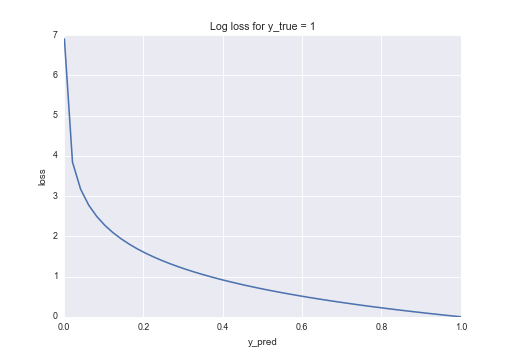

In [36]:
# plot loss
plt.plot(x, y)
plt.title("Log loss for y_true = {}".format(y_true, margin))
plt.xlabel("y_pred")
plt.ylabel("loss")
plt.show()

# Regression

In [46]:
y_true = [3, 0, 2, 7]
y_pred = [4, 0, 3, 8]

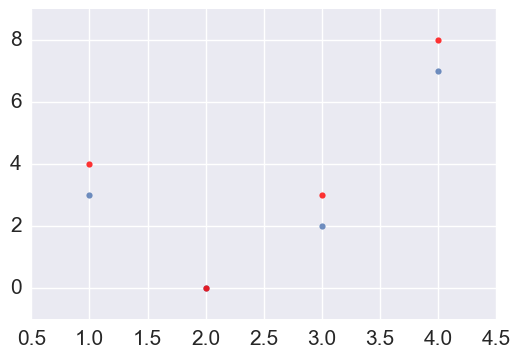

In [47]:
sns.regplot(x=np.arange(1,len(y_true)+1), y=np.array(y_true), fit_reg =False)
sns.regplot(x=np.arange(1,len(y_true)+1), y=np.array(y_pred), color='r', fit_reg =False)
sns.plt.show()

In [48]:
metrics.mean_absolute_error(y_true, y_pred)

0.75

In [49]:
metrics.mean_squared_error(y_true, y_pred)

0.75

# Hinge Loss

Also max-margin loos (proper of SVMs).

$$l(y, \hat{y}) = max(0, 1-(y \cdot \hat{y}))$$

As can be observed, $y = \pm1$

In [2]:
def hinge_loss(y_true, y_pred, margin=1):
    return max(0, margin-(y_true*y_pred))

In [3]:
hinge_loss(1, 1)

0

In [18]:
# compute loss for different predicted values
y_true = 1
margin = 1
x = np.linspace(-1, 1, 10)
y = [hinge_loss(y_true, y_pred, margin) for y_pred in x]

<IPython.core.display.Javascript object>


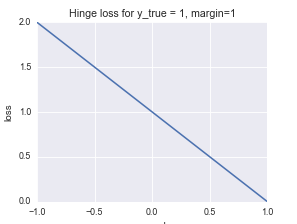

In [19]:
# plot loss
plt.plot(x, y)
plt.title("Hinge loss for y_true = {}, margin={}".format(y_true, margin))
plt.xlabel("y_pred")
plt.ylabel("loss")
plt.show()